# Numerical Computing: Homework 3

* Polynomials in `numpy`
https://numpy.org/doc/stable/reference/routines.polynomials-package.html#module-numpy.polynomial

* Interpolation (https://docs.scipy.org/doc/scipy/tutorial/interpolate.html)
    * Polynomial interpolation
    * B-splines 

* Function approximation
    * Polynomial approximation 
    * Smoothing splines


#### Instructions

* The code should follow 
    * PEP 20 – The Zen of Python. https://peps.python.org/pep-0020    
    * PEP 8 – Style Guide for Python Code. <https://peps.python.org/pep-0008>
    * PEP 257 – Docstring Conventions. https://peps.python.org/pep-0257
    * Type hints. https://docs.python.org/3/library/typing.html
    * Mypy. https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html
    * Google Python sytle guide. https://google.github.io/styleguide/pyguide.html  

* Please use Markdown [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet] cells with formulas in latex for the derivations. Alternatively, insert a scanned image of the derivations, as it is here done with the Alan Turing [https://www.turing.org.uk/] picture.


![alt text](alan-turing.jpg "Alan Turing")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from numpy.polynomial import Polynomial, Chebyshev, Legendre

from numerical_computing_HW_003_curve_fitting_2024_10_02 import ChebyshevApproximation

import scipy as sc


### Polynomials in numpy

In [5]:
polynomial_coefficients = (0.5, 2.3, -1.7, 0.0, 4.8)
polynomial = Polynomial(polynomial_coefficients)
print(polynomial)

factorial = 1.0
for i in range(polynomial.degree() + 2):
    print(
        'coefficient[{:d}] = {:3.1f}'.format(
            i, 
            polynomial.deriv(i)(0.0) / factorial
        )
    )
    factorial *= (i + 1) 


0.5 + 2.3 x - 1.7 x**2 + 0.0 x**3 + 4.8 x**4
coefficient[0] = 0.5
coefficient[1] = 2.3
coefficient[2] = -1.7
coefficient[3] = 0.0
coefficient[4] = 4.8
coefficient[5] = 0.0


### Function approximation

    

Polynomial fit of degree 3: 
	 0.51265526 - 1.9414016 x - 0.9921174 x**2 + 1.46193946 x**3

Minimax property of the Chebyshev approximation
Maximum error of the polynomial approximation: 0.2088
Maximum error of the Chebyshev approximation: 0.1386


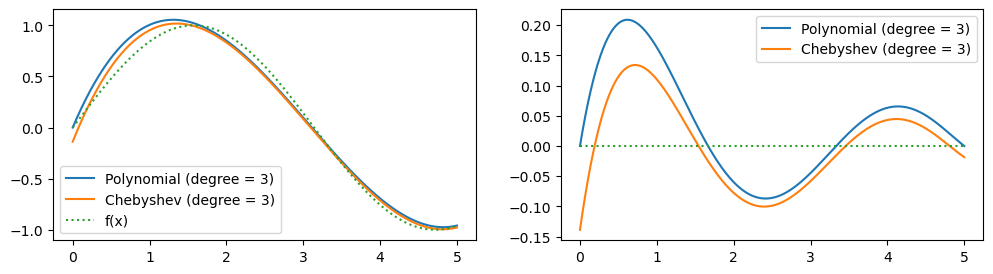

In [8]:
a, b = 0.0, 5.0
f = np.sin

# Linear fit
degree = 3 # Degree of the approximation
x = np.linspace(a, b, num=degree+1)
y = f(x)

polynomial_fit = Polynomial.fit(x, y, degree) 
print(
    'Polynomial fit of degree {:d}: \n\t'.format(degree)
    , polynomial_fit
)
x_pred, y_pred_polynomial = polynomial_fit.linspace(1000, (a, b))
y_true = f(x_pred)
error_pred_polynomial = y_pred_polynomial - y_true

# Chebyshev approximation
chebyshev_approximation = ChebyshevApproximation(a, b, degree, f)
y_pred_chebyshev = chebyshev_approximation.eval(x_pred) # math.sin(0.1) = 0.099833416646828155
error_pred_chebyshev = y_pred_chebyshev - y_true

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(
    x_pred, 
    y_pred_polynomial, 
    label='Polynomial (degree = {:d})'.format(degree)
)
axs[0].plot(
    x_pred, 
    y_pred_chebyshev, 
    label='Chebyshev (degree = {:d})'.format(degree)
)
axs[0].plot(x_pred, y_true, ':', label='f(x)')
axs[0].legend()

axs[1].plot(
    x_pred, 
    y_pred_polynomial - y_true,
    label='Polynomial (degree = {:d})'.format(degree)
)
axs[1].plot(
    x_pred, 
    y_pred_chebyshev - y_true,
    label='Chebyshev (degree = {:d})'.format(degree)
)
axs[1].plot(x_pred, np.zeros_like(x_pred), ':')
axs[1].legend()


print('\nMinimax property of the Chebyshev approximation')

print('Maximum error of the polynomial approximation: {:.4g}'.format(
        np.max(np.abs(error_pred_polynomial))
    )
)
print('Maximum error of the Chebyshev approximation: {:.4g}'.format(
        np.max(np.abs(error_pred_chebyshev))
    )
)

### Polynomial fit

<>:51: SyntaxWarning: invalid escape sequence '\h'
<>:51: SyntaxWarning: invalid escape sequence '\h'
C:\Users\david\AppData\Local\Temp\ipykernel_19736\2269913209.py:51: SyntaxWarning: invalid escape sequence '\h'
  ax[i, 0].set_ylabel('$\hat{y}$')


Polynomial fit of degree 1: 
	 0.03562344 - 0.8220733 x 

Polynomial fit of degree 3: 
	 0.49638869 - 1.71267964 x - 1.15191315 x**2 + 1.2508516 x**3 

Polynomial fit of degree 5: 
	 0.46805281 - 1.55485376 x - 0.90594194 x**2 + 0.59554309 x**3 -
0.24597121 x**4 + 0.51734882 x**5 

Polynomial fit of degree 10: 
	 0.49997612 - 2.87979306 x - 3.23800638 x**2 + 23.09514663 x**3 +
20.22057942 x**4 - 97.30237752 x**5 - 58.04630818 x**6 +
150.10282942 x**7 + 65.30452858 x**8 - 73.46119837 x**9 -
25.40758592 x**10 



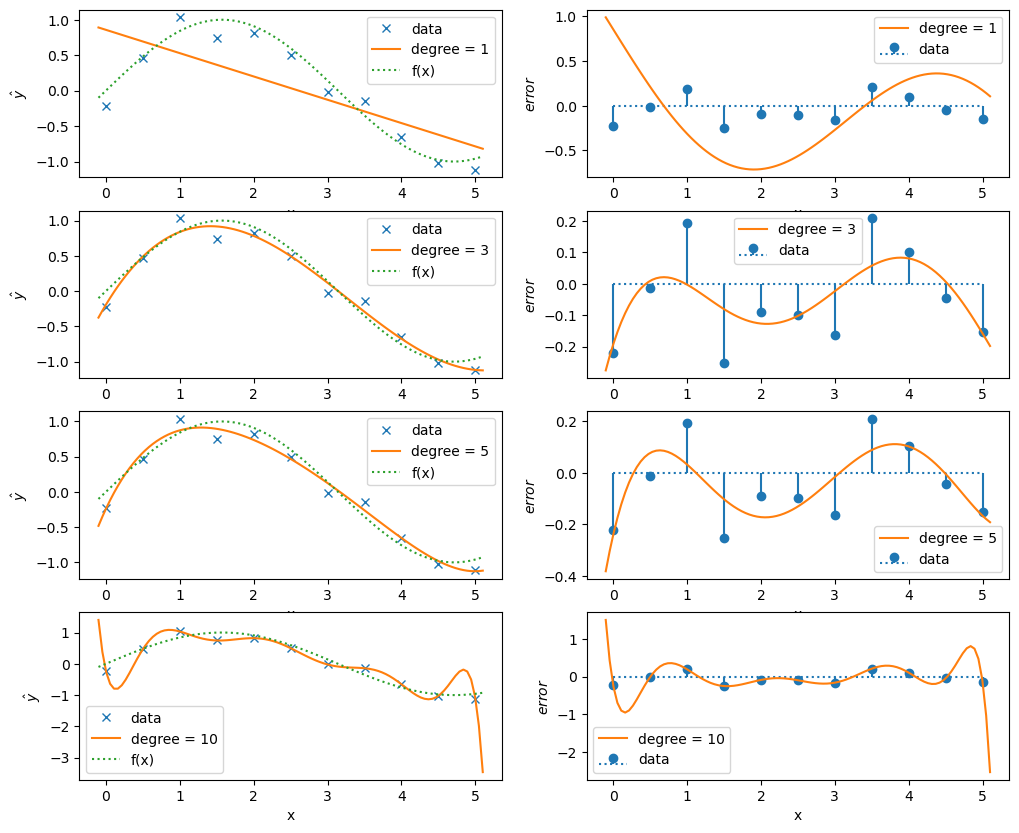

In [74]:
# Generate synthetic data

x = np.linspace(a, b, num=11)                                                                                                  

noise_level = 0.2
rng = np.random.default_rng(seed=8123)
noise_y = noise_level * rng.standard_normal(np.size(x))
y_measured = f(x) + noise_y

"""
data = pd.DataFrame({'x': x, 'y': y})

# Write data to CSV file:
data.to_csv('data.csv', index=True, index_label='n')

# Read data from CSV file:
data = pd.read_csv('data.csv')
x = np.array(data['x'])
y_measured = np.array(data['y'])

"""

# Setup the fit

degrees = [1, 3, 5, len(y_measured)-1]

x_slack = 0.1
x_domain = (np.min(x) - x_slack, np.max(x) + x_slack)
n_domain = 100
x_pred = np.linspace(*x_domain, n_domain)
y_true = f(x_pred)

fig, ax = plt.subplots(len(degrees), 2, figsize=(12, 10))

for i, degree in enumerate(degrees):
    
    polynomial_fit = Polynomial.fit(x, y_measured, deg=degree) 
    
    print(
        'Polynomial fit of degree {:d}: \n\t'.format(degree), 
        polynomial_fit, 
        '\n'
    )
    
    x_pred, y_pred = polynomial_fit.linspace(n_domain, x_domain)
    
    ax[i, 0].plot(x, y_measured, 'x', label='data')
    ax[i, 0].plot(x_pred, y_pred, label='degree = {:d}'.format(degree))
    ax[i, 0].plot(x_pred, y_true, ':', label='f(x)')
    ax[i, 0].set_xlabel('x')
    ax[i, 0].set_ylabel('$\hat{y}$')
    ax[i, 0].legend()
    
    # ax[i, 1].plot(x, np.zeros_like(x), ':')
    ax[i, 1].stem(x, noise_y, basefmt=':', label='data')
    ax[i, 1].plot(
        x_pred, 
        y_pred - y_true, 
        label='degree = {:d}'.format(degree)
    )
    ax[i, 1].set_xlabel('x')
    ax[i, 1].set_ylabel('$error$')
    ax[i, 1].legend()

### Exercises
1. B-splines 
    1. Explain briefly what is a B-spline. Especifically, what is different between a B-spline and a natural cubic spline.
    2. Use B-splines of different orders to fit the data with different noise levels. Comment the results, especially regarding robustness to noise.
    * Splines in 5 minutes: Part 1 -- cubic curves: https://www.youtube.com/watch?v=YMl25iCCRew
    * Splines in 5 minutes: Part 2 -- splines:      https://www.youtube.com/watch?v=DLsqkWV6Cag
    * Splines in 5 minutes: Part 3 -- B-splines:    https://www.youtube.com/watch?v=JwN43QAlF50
    
2. Smoothing splines
    1. Explain briefly what is a smoothing spline. Especifically, what is different between a B-spline and a natural cubic spline?
    2. Use smoothing splines (https://youtu.be/queK1reC-ac?si=6JI5OHoLjVZ4yGLi) to fit the data for different noise leves, using different values of the smoothing parameter. 
    1. Comment the results, especially regarding robustness to noise. 
    2. What happens if the smoothing parameter is very small? And if it is very large?
    3. Comment the differences between the results with splines and with smoothing splines.
3. The cdf of the standard Gaussian is defined as $\text{norm.cdf}(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x dz e^{-\frac{z^2}{2}}$. The direct computation of this funtion by numerical quadrature is costly. Therefore, one generarally resorts to approximations that can be computed efficiently. Give such three different closed-form approximations of the funcion and compare their errors in the support of the distribution. Provide an empirical analysis of their computational costs.
4. Explain what is Runge's phemomenon. 
    1. Give an illustrative example.
    2. Identify a strategy to avoid this phenomenon.    
5. Explain what are thin plate splines and provide an illustration.
6. Explain what are interpolating filters and provide an illustration (https://www.youtube.com/watch?v=Xj129kA3Ci0).
6. Explain how one would use interpolation to increase the number of frames per second in a movie. Provide an illustration.

#### Ejercicio 2


Smoothing splines consiste en encontrar una función que intenta minimizar el error cuadrático medio de los puntos de la muestra respecto a la función con la que se aproxima, y al mismo tiempo, evitar funciones con curvas que se ajustan demasiado a los datos. De esta manera, la función resultante ya no interpola los puntos sino que se acerca a ellos, dejando ver una curva más representativa de cómo puede que se comporten estos datos.

En las gráficas de la siguiente celda se puede observar que los smoothing splines son capaces de realizar decentemente buenas aproximaciones a pesar del aumento de ruido. Sin embargo, la versión sin suavizar interpola los puntos de la muestra a cambio de perder la tendencia que siguen los datos.

Si el parámetro de suavidad es muy pequeño, la función aproximante interpola los valores ignorando la función que genera los datos. En el otro extremo, la función tenderá a una línea recta a medida que se aumente el valor del parámetro.

<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
C:\Users\david\AppData\Local\Temp\ipykernel_19736\3399894245.py:29: SyntaxWarning: invalid escape sequence '\h'
  ax[i, 0].set_ylabel('$\hat{y}$')


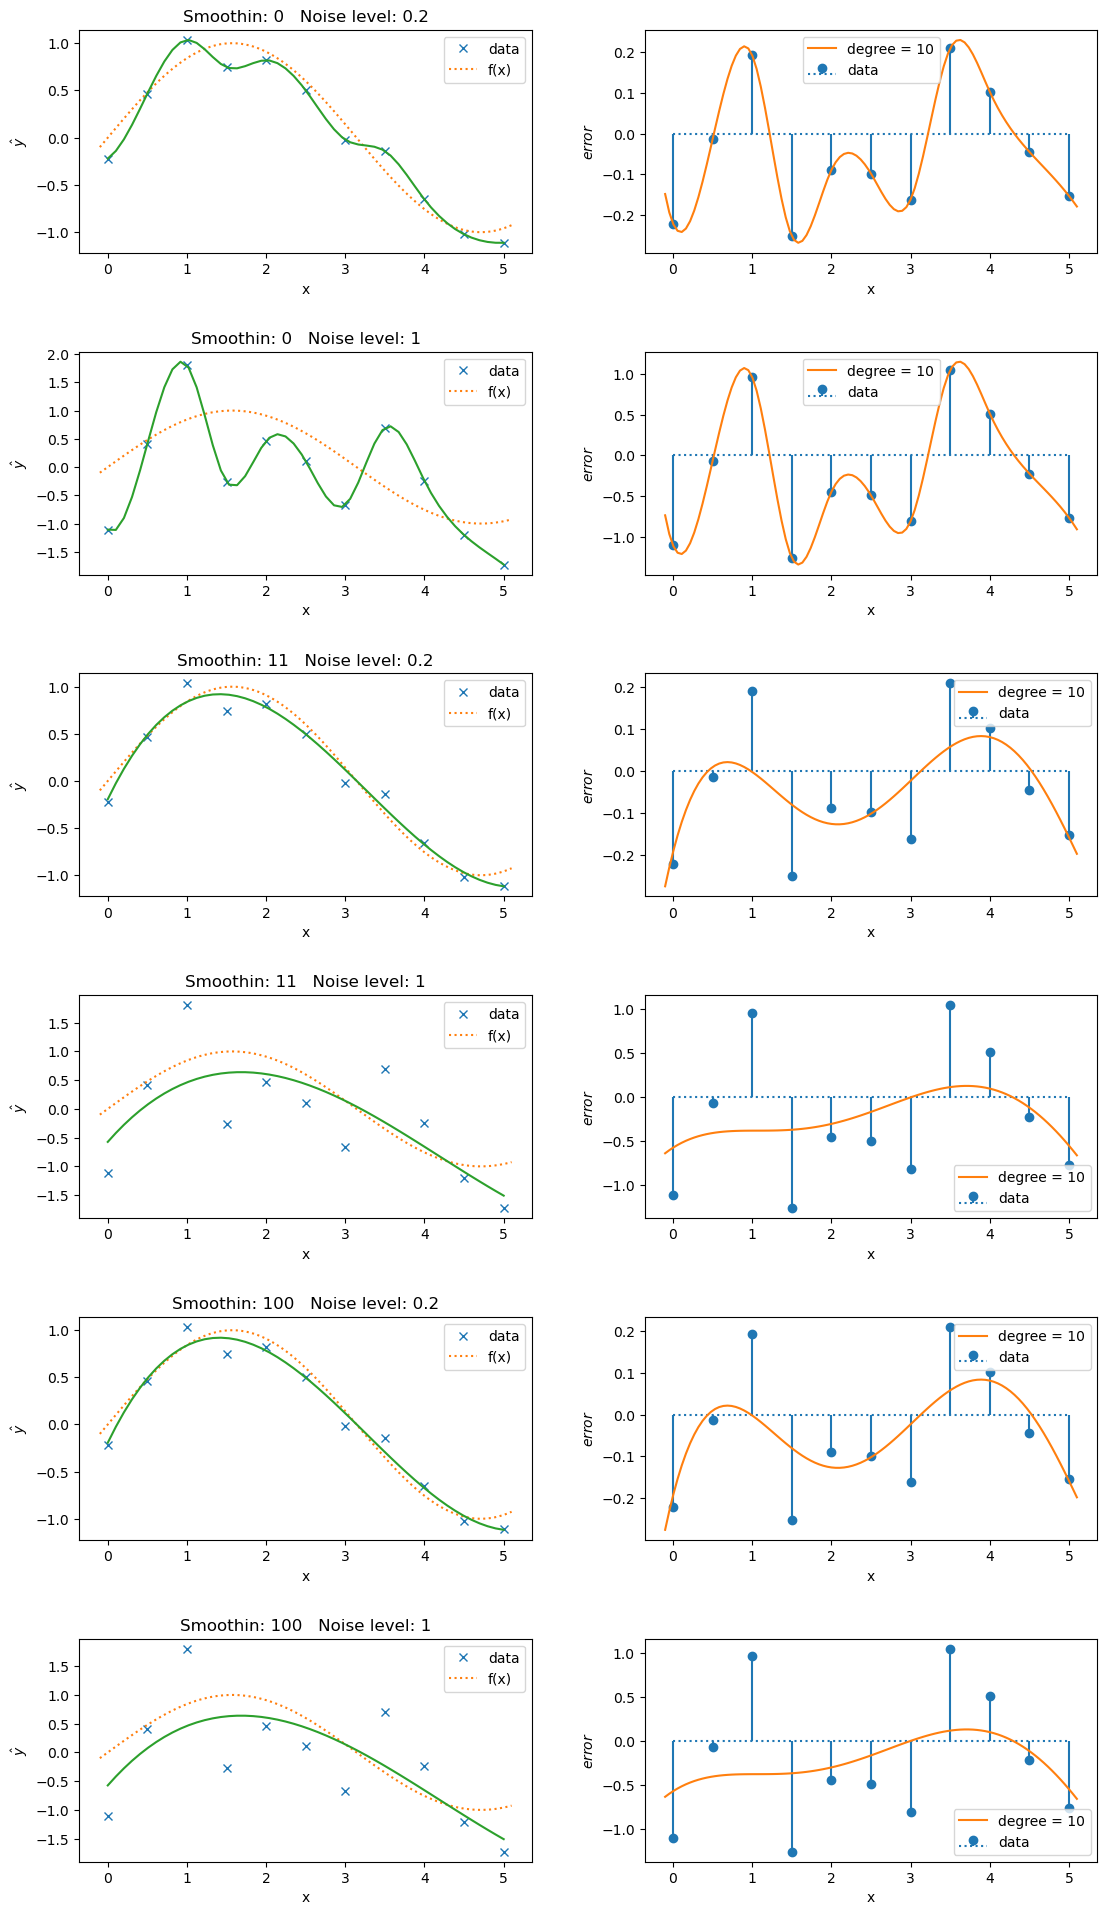

In [166]:
s_values = [0, 11, 100]

x = np.linspace(a, b, num=11)
x_morevalues = np.linspace(a, b, num=50)     

noise_levels = [0.2, 1]


x_slack = 0.1
x_domain = (np.min(x) - x_slack, np.max(x) + x_slack)
n_domain = 100
x_pred = np.linspace(*x_domain, n_domain)
y_true = f(x_pred)

fig, ax = plt.subplots(len(s_values)*len(noise_levels), 2, figsize=(12, 20))
fig.tight_layout(pad=5.0)

for i, (s_value, noise_level) in enumerate([(f,s) for f in s_values for s in noise_levels]):
    rng = np.random.default_rng(seed=8123)
    noise_y = noise_level * rng.standard_normal(np.size(x))
    y_measured = f(x) + noise_y

    ax[i, 0].plot(x, y_measured, 'x', label='data')
    ax[i, 0].plot(x_pred, y_true, ':', label='f(x)')
    smooth_spline = sc.interpolate.splrep(x, y_measured, s=s_value)
    y_smooth = sc.interpolate.splev(x_morevalues, smooth_spline, der=0)
    ax[i, 0].plot(x_morevalues, y_smooth)
    ax[i, 0].set_xlabel('x')
    ax[i, 0].set_ylabel('$\hat{y}$')
    ax[i, 0].legend()

    ax[i, 1].stem(x, noise_y, basefmt=':', label='data')
    y_pred = sc.interpolate.splev(x_pred, smooth_spline, der=0)
    ax[i, 1].plot(
        x_pred, 
        y_pred - y_true, 
        label='degree = {:d}'.format(degree)
    )
    ax[i, 1].set_xlabel('x')
    ax[i, 1].set_ylabel('$error$')
    ax[i, 1].legend()
    ax[i, 0].set_title(f'Smoothin: {s_value}   Noise level: {noise_level}')



#### Ejercicio 3

https://www.ijser.org/researchpaper/Approximations-to-Standard-Normal-Distribution-Function.pdf

In [14]:
# Tocher approximation

x = np.array([-0.5, 1])

def Polya(x):
    less_than_zero = x < 0
    x = np.where(less_than_zero, -x, x)
    
    exponent = -2*np.square(x)/np.pi
    result = 0.5*(np.sqrt(1 - np.exp(exponent)) +1)

    return np.where(less_than_zero, 1 - result, result)

def Tocher(x):
    less_than_zero = x < 0
    x = np.where(less_than_zero, -x, x)
    
    k = np.sqrt(8/np.pi)
    numerator = np.exp(np.dot(k, x))
    denominator = 1 + numerator
    result = numerator/denominator
    
    return np.where(less_than_zero, 1 - result, result)

print('Tocher\t', Tocher(x))
print('Polya\t', Polya(x))
print('Scipy\t', sc.stats.norm.cdf(x))

Tocher	 [0.31047821 0.83142623]
Polya	 [0.30820858 0.84311885]
Scipy	 [0.30853754 0.84134475]
